<a href="https://colab.research.google.com/github/DivyanshiChawla/OIB-SIP/blob/main/Email_Spam_Detection_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Collection**

In [2]:
df = pd.read_csv('/content/spam.csv', encoding = 'latin-1')
df.head(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.size

27860

**Data Cleaning**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
# dropping last three columns because they contain 50, 12, 6 non-null values out of 5572.
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [8]:
df.sample(4)

,v1,v2
1765,ham,Hi this is yijue... It's regarding the 3230 te...
3540,ham,If you are not coughing then its nothing
825,ham,Hmm .. Bits and pieces lol ... *sighs* ...
4946,spam,Great News! Call FREEFONE 08006344447 to claim...


In [9]:
# renaming the columns
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [10]:
df.sample(4)

,target,text
1264,ham,I will see in half an hour
4286,ham,I wud never mind if u dont miss me or if u don...
2846,spam,Free-message: Jamster!Get the crazy frog sound...
895,ham,Superb Thought- \Be grateful that u dont have ...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head(4)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [14]:
# checking the missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# checking the duplicated values
df.duplicated().sum()

403

In [16]:
# removing duplicate values
df = df.drop_duplicates(keep = 'first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

**Exploratory Data Analysis**

In [19]:
df.head(6)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

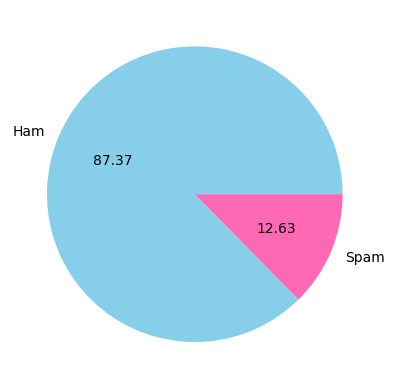

In [21]:
colours= ['skyblue', 'hotpink']
plt.pie(df['target'].value_counts(), labels = ['Ham', 'Spam'], autopct = '%0.2f', colors = colours)
plt.show()

From the above distribution, The data is imbalanced.

Now, analysing the number of alphabets, words & sentences which are being used in the email. And then creating another three columns for deeper analysis.

In [22]:
# Installation of NLTK(Natural Language Toolkit) ->
# It is a popular library for working with human laguage data in Python.
# It provides a wide range of tools and resources for tasks such as tokenization, part-of-speech, tagging, parsing, semantic reasoning and more.

In [23]:
import nltk

In [24]:
# downloading the 'punkt' resource from nltk.
# It is a data package that includes pre-trained models and tokenizers for various languages.
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
# calculating no. of characters in the email
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [26]:
# storing no. of characters in new var/columns
df['num_characters'] = df['text'].apply(len)

In [27]:
df.head(4)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49


In [28]:
# fetching no. of words
df['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [29]:
# calculating length of each list
df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

These are the number of words used per email.

In [30]:
# storing no. of words in new var/column (num_words)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [31]:
df.head(4)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13


In [32]:
# fetching no. of sentences in single email
df['text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [33]:
# calculating length of each sentence
df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [34]:
# storing no. of sentence in new var/coulumn (num_sentences)
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [35]:
df.head(4)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1


In [36]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
# spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

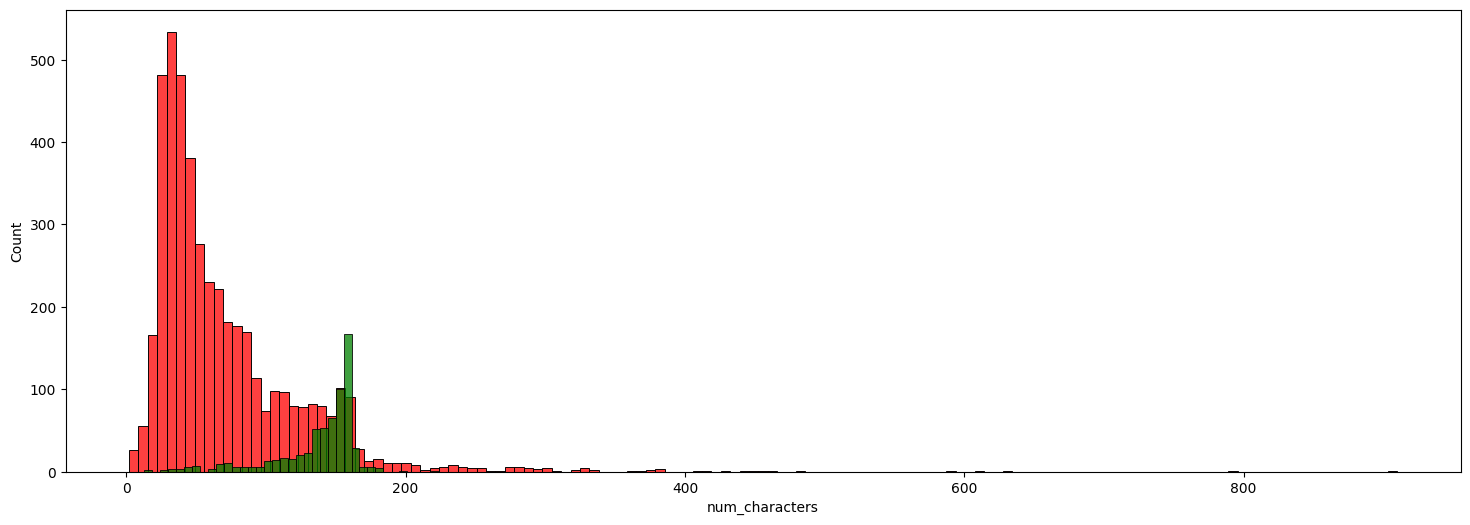

In [39]:
# plotting histogram of ham and spam email
plt.figure(figsize = (18, 6))
sns.histplot(df[df['target'] == 0]['num_characters'], color = 'red')
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'green')

<Axes: xlabel='num_words', ylabel='Count'>

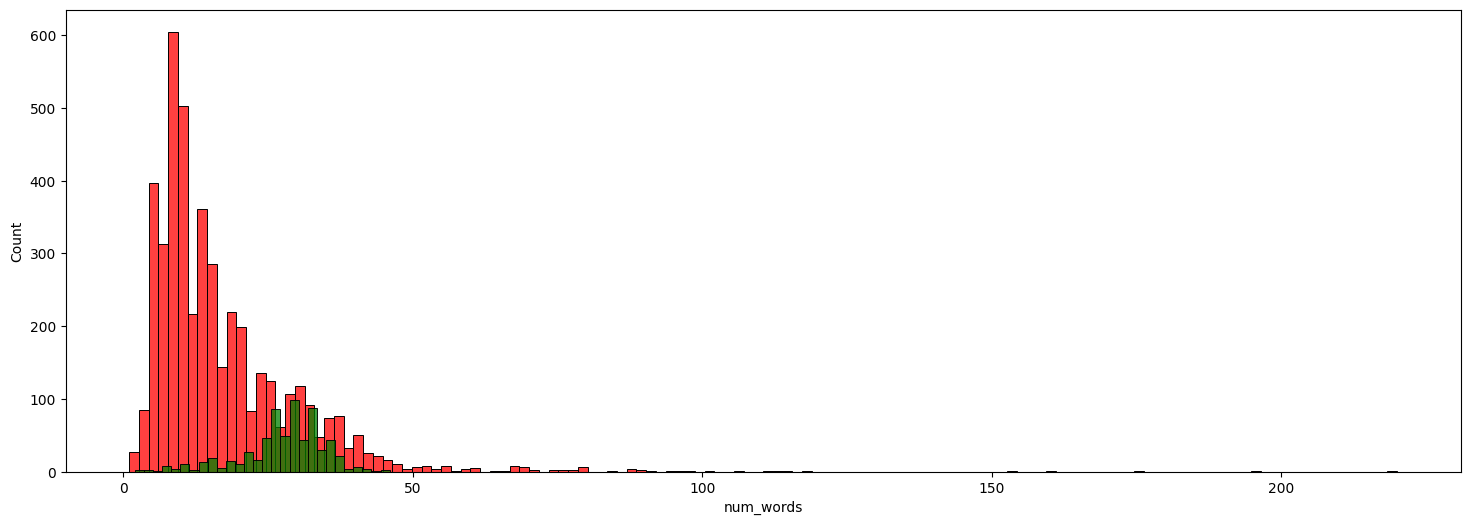

In [40]:
plt.figure(figsize = (18, 6))
sns.histplot(df[df['target'] == 0]['num_words'], color = 'red')
sns.histplot(df[df['target'] == 1]['num_words'], color = 'green')

<Axes: xlabel='num_sentences', ylabel='Count'>

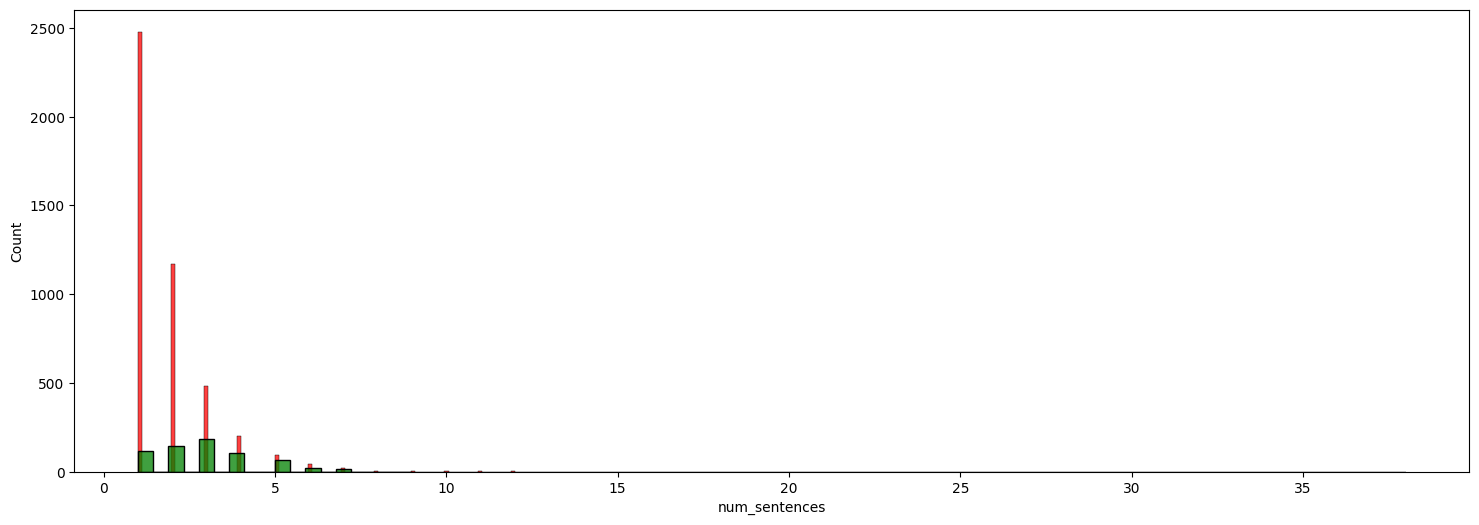

In [41]:
plt.figure(figsize = (18, 6))
sns.histplot(df[df['target'] == 0]['num_sentences'], color = 'red')
sns.histplot(df[df['target'] == 1]['num_sentences'], color = 'green')

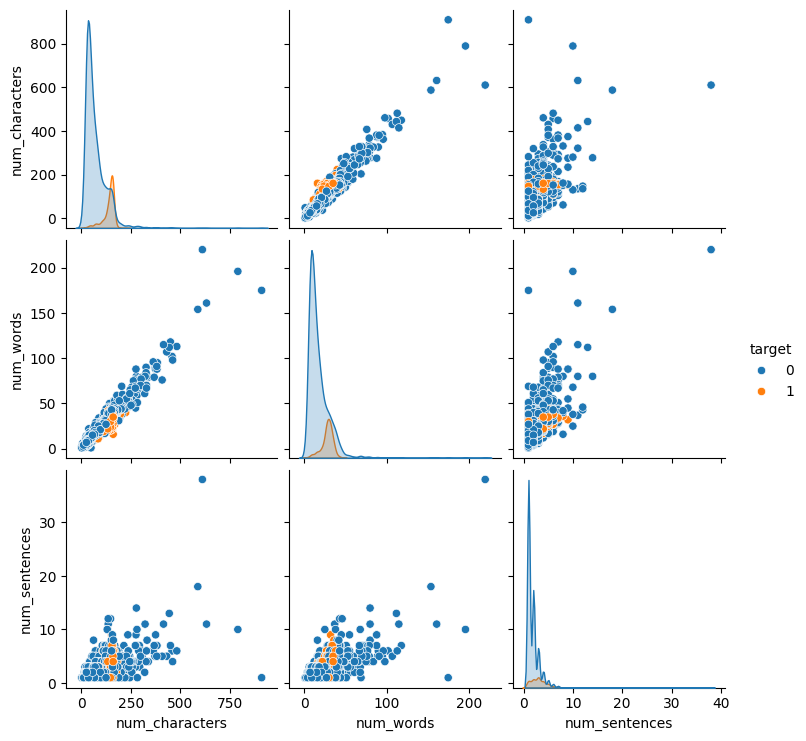

In [42]:
sns.pairplot(df, hue = 'target')

In [43]:
df[['target', 'num_characters', 'num_words', 'num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

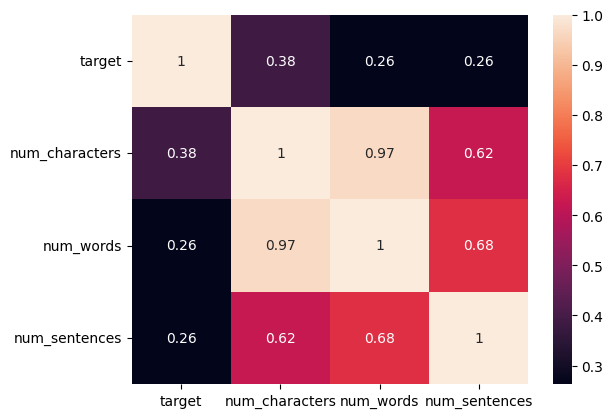

In [44]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot = True)

**Data/Text Pre-Processing**

In [45]:
# i) Lower
def transform_text1(text1):
  text1 = text1.lower()
  return text1

In [46]:
transform_text1('Hello, how are you?')

'hello, how are you?'

In [47]:
# ii) Tokenization
def transform_text2(text2):
  text2 = nltk.word_tokenize(text2)
  return text2

In [48]:
transform_text2('Hello, how are you?')

['Hello', ',', 'how', 'are', 'you', '?']

In [49]:
# iii) Removing special character
def transform_text3(text3):
  y = []
  for char in text3:
    if char.isalnum():
      y.append(char)
  return y

In [50]:
transform_text3('Hello, how are you?')

['H', 'e', 'l', 'l', 'o', 'h', 'o', 'w', 'a', 'r', 'e', 'y', 'o', 'u']

In [51]:
def transform_text3a(text3a):
  text3a = text3a.lower()
  text3a = nltk.word_tokenize(text3a)
  y_a = []
  for char in text3a:
    if char.isalnum():
      y_a.append(char)
  return y_a

In [52]:
transform_text3a('Hello, how are @ 15 you?')

['hello', 'how', 'are', '15', 'you']

In [53]:
# iv) Removing stop words and punctuation
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [54]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
def transform_text4(text4):
  text4 = text4.lower()
  text4 = nltk.word_tokenize(text4)
  y_b = []
  for char in text4:
    if char.isalnum():
      y_b.append(char)
  text4 = y_b[:]
  y_b.clear()
  for char in text4:
    if char not in stopwords.words('english') and char not in string.punctuation:
      y_b.append(char)
  return y_b

In [56]:
transform_text4('Hello, how are 10 15 you? Yay')

['hello', '10', '15', 'yay']

In [57]:
#  v) Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [58]:
def transform_text5(text5):
  text5 = text5.lower()
  text5 = nltk.word_tokenize(text5)
  y_c = []
  for char in text5:
    if char.isalnum():
      y_c.append(char)
  text5 = y_c[:]
  y_c.clear()
  for char in text5:
    if char not in stopwords.words('english') and char not in string.punctuation:
      y_c.append(char)
  text5 = y_c[:]
  y_c.clear()
  for char in text5:
    y_c.append(ps.stem(char))
  return " ".join(y_c)
# y_c is a list of strings.
# [" ".join(y_c)] expression can be used to join the elements of the list into
# a single string separated by spaces. The elements of the y_c list are joined
# together using the " " (space) separator.

In [59]:
transform_text5('I loved dancing before I started singing')

'love danc start sing'

In [60]:
df['text'][200]

'I sent you  &lt;#&gt;  bucks'

In [61]:
transform_text5(df['text'][200])

'sent lt gt buck'

In [62]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [63]:
transform_text5(df['text'][2000])

'b go 2 sch mon si need 2 take smth'

In [64]:
# adding new var/column (transform_text)
df['text'].apply(transform_text1)

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: text, Length: 5169, dtype: object

In [65]:
df['Transform_text'] = df['text'].apply(transform_text1)

In [66]:
df.head(4)

,target,text,num_characters,num_words,num_sentences,Transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go until jurong point, crazy.. available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor... u c already then say...


In [67]:
# creating word cloud of spam messages
!pip install wordcloud

In [68]:
!pip install --upgrade wordcloud

In [69]:
!pip install pillow

In [70]:
!pip install --upgrade pillow

In [72]:
from wordcloud import WordCloud
from PIL import Image, ImageDraw, ImageFont
wc = WordCloud(width = 1000, height = 500, min_font_size= 10, background_color = 'white')

In [73]:
df['target']==1

0       False
1       False
2        True
3       False
4       False
        ...  
5567     True
5568    False
5569    False
5570    False
5571    False
Name: target, Length: 5169, dtype: bool

In [74]:
df[df['target']==1]

,target,text,num_characters,num_words,num_sentences,Transform_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in 2 a wkly comp to win fa cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner!! as a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,had your mobile 11 months or more? u r entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,"six chances to win cash! from 100 to 20,000 po..."
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex in 30 secs? ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,asked 3mobile if 0870 chatlines inclu in free ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,had your contract mobile 11 mnths? latest moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,reminder from o2: to get 2.50 pounds free call...


In [75]:
df[df['target']==1]['Transform_text']

2       free entry in 2 a wkly comp to win fa cup fina...
5       freemsg hey there darling it's been 3 week's n...
8       winner!! as a valued network customer you have...
9       had your mobile 11 months or more? u r entitle...
11      six chances to win cash! from 100 to 20,000 po...
                              ...                        
5537    want explicit sex in 30 secs? ring 02073162414...
5540    asked 3mobile if 0870 chatlines inclu in free ...
5547    had your contract mobile 11 mnths? latest moto...
5566    reminder from o2: to get 2.50 pounds free call...
5567    this is the 2nd time we have tried 2 contact u...
Name: Transform_text, Length: 653, dtype: object

In [76]:
df[df['target']==1]['Transform_text'].str.cat(sep = ' ')

'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c\'s apply 08452810075over18\'s freemsg hey there darling it\'s been 3 week\'s now and no word back! i\'d like some fun you up for it still? tb ok! xxx std chgs to send, å£1.50 to rcv winner!! as a valued network customer you have been selected to receivea å£900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only. had your mobile 11 months or more? u r entitled to update to the latest colour mobiles with camera for free! call the mobile update co free on 08002986030 six chances to win cash! from 100 to 20,000 pounds txt> csh11 and send to 87575. cost 150p/day, 6days, 16+ tsandcs apply reply hl 4 info urgent! you have won a 1 week free membership in our å£100,000 prize jackpot! txt the word: claim to no: 81010 t&c www.dbuk.net lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub: to use your credit, click the wap link in the next txt messag

In [77]:
wc.generate(df[df['target']==1]['Transform_text'].str.cat(sep = ' '))

In [78]:
spam_wc = wc.generate(df[df['target']==1]['Transform_text'].str.cat(sep = ' '))

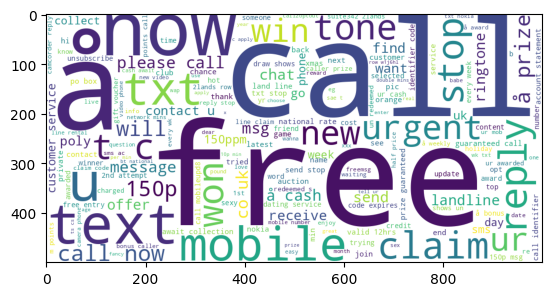

In [79]:
plt.imshow(spam_wc)

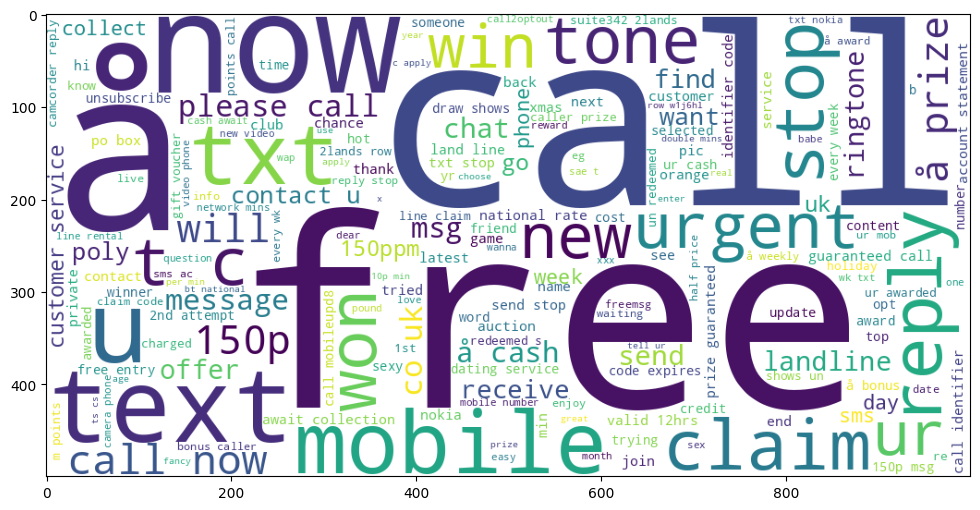

In [82]:
plt.figure(figsize = (18, 6))
plt.imshow(spam_wc)

In [83]:
# for ham
ham_wc = wc.generate(df[df['target']==0]['Transform_text'].str.cat(sep = ' '))

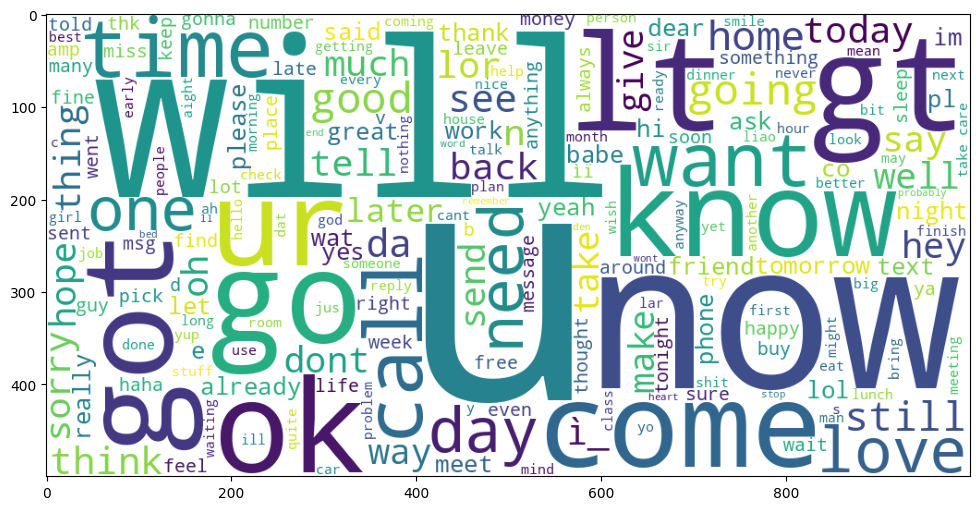

In [84]:
plt.figure(figsize = (18, 6))
plt.imshow(ham_wc)

In [85]:
df.head(5)

,target,text,num_characters,num_words,num_sentences,Transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go until jurong point, crazy.. available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor... u c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah i don't think he goes to usf, he lives aro..."
